In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_img(img, title=""):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.show()

In [4]:
jota = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo B/images/j.png", 0)
np.unique(jota)

array([  0, 255], dtype=uint8)

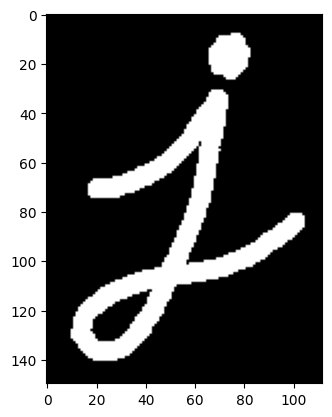

In [5]:
show_img(jota)

---
## Apertura

Erosión -> Dilatación

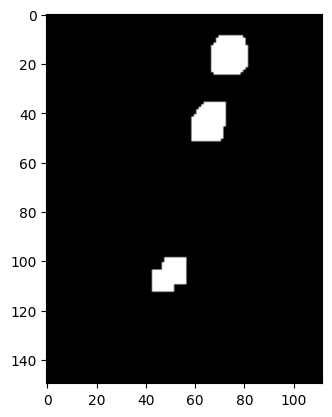

In [12]:
s_e = np.ones((9, 9), np.uint8)
# tmp = cv.erode(jota, s_e)
# apertura = cv.dilate(tmp, s_e)
show_img(cv.dilate(cv.erode(jota, s_e), s_e))

In [14]:
j_noise = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo B/images/j_noise.png", 0)
np.unique(j_noise)

array([  0,   1,   2,   3,   4,   7,  10,  11,  12,  16,  18,  19,  21,
        23,  24,  26,  31,  33,  34,  36,  37,  42,  43,  44,  48,  55,
        56,  64,  68,  70,  71,  72,  73,  78,  96, 104, 105, 106, 107,
       108, 109, 111, 112, 123, 124, 126, 127, 128, 130, 133, 143, 159,
       166, 167, 168, 170, 172, 187, 188, 189, 190, 191, 192, 194, 207,
       212, 214, 226, 227, 228, 233, 239, 255], dtype=uint8)

In [15]:
umbral, j_noise_bin = cv.threshold(j_noise, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

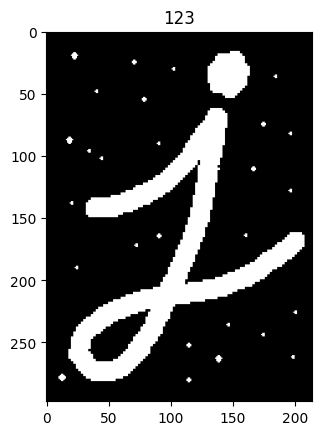

In [17]:
show_img(j_noise_bin, str(int(umbral)))

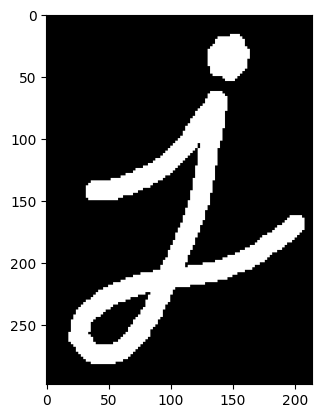

In [20]:
s_e = np.ones((5, 5), np.uint8)
show_img(cv.dilate(cv.erode(j_noise_bin, s_e), s_e))

---
`cv.morphologyEx()`

In [21]:
cv.MORPH_ERODE

0

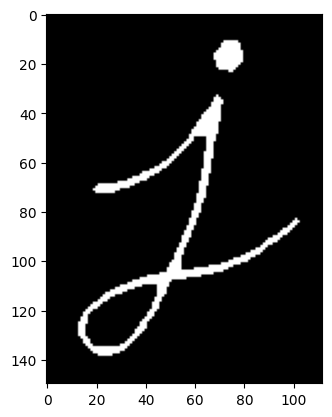

In [24]:
# Erosión con cv.morphologyEx() - ESTO NO TIENE SENTIDO PORQUE EROSIÓN ES UNA OP PRIMITIVA Y TIENE SU PROPIA FUNCIÓN

show_img(cv.morphologyEx(jota, cv.MORPH_ERODE, s_e))

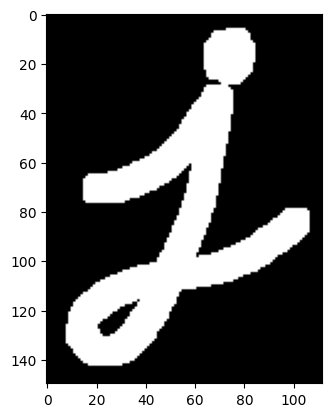

In [25]:
# Dilatación con cv.morphologyEx() - ESTO NO TIENE SENTIDO PORQUE DILATACIÓN ES UNA OP PRIMITIVA Y TIENE SU PROPIA FUNCIÓN

show_img(cv.morphologyEx(jota, cv.MORPH_DILATE, s_e))

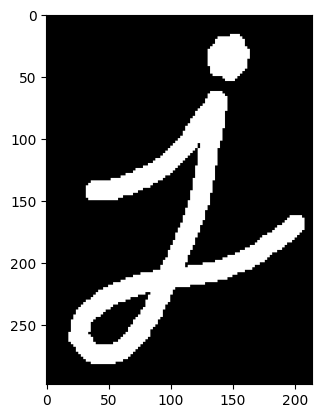

In [32]:
# Apertura con cv.morphologyEx() 
s_e = np.ones((3, 3), np.uint8)
show_img(cv.morphologyEx(j_noise_bin, cv.MORPH_OPEN, s_e, iterations=2))

---
## Cierre

Dilatación -> Erosión  

In [33]:
j_hole = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic25/Grupo B/images/j_hole.png", 0)
np.unique(j_noise)

array([  0,   1,   2,   3,   4,   7,  10,  11,  12,  16,  18,  19,  21,
        23,  24,  26,  31,  33,  34,  36,  37,  42,  43,  44,  48,  55,
        56,  64,  68,  70,  71,  72,  73,  78,  96, 104, 105, 106, 107,
       108, 109, 111, 112, 123, 124, 126, 127, 128, 130, 133, 143, 159,
       166, 167, 168, 170, 172, 187, 188, 189, 190, 191, 192, 194, 207,
       212, 214, 226, 227, 228, 233, 239, 255], dtype=uint8)

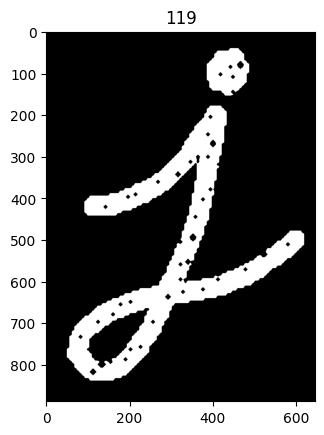

In [34]:
umbral, j_hole_bin = cv.threshold(j_hole, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
show_img(j_hole_bin, str(int(umbral)))

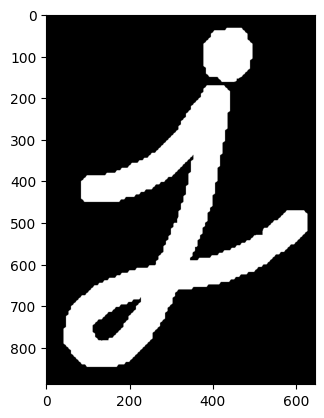

In [43]:
show_img(cv.dilate(j_hole_bin, s_e, iterations=8))

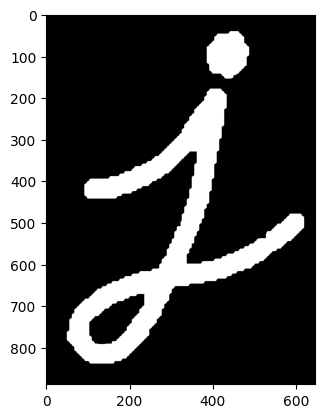

In [44]:
show_img(cv.erode(cv.dilate(j_hole_bin, s_e, iterations=8), s_e, iterations=8))

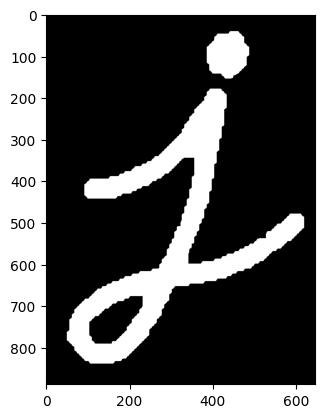

In [47]:
show_img(cv.morphologyEx(j_hole_bin, cv.MORPH_CLOSE, s_e, iterations=12))

## Morphological Gradient
It is the difference between dilation and erosion of an image.

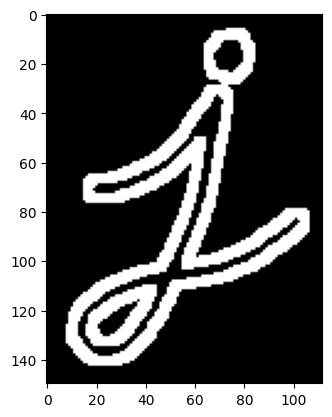

In [50]:
s_e2 = np.ones((5, 5), np.uint8)
show_img(cv.morphologyEx(jota, cv.MORPH_GRADIENT, s_e2))

---
## Top Hat
It is the difference between input image and Opening of the image. Below example is done for a 9x9 kernel.

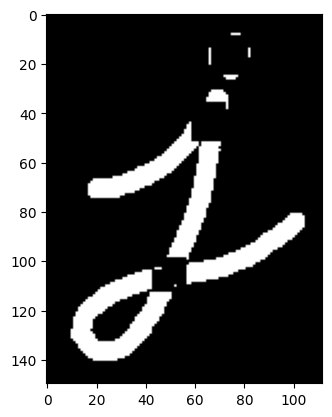

In [51]:
s_e3 = np.ones((9, 9), np.uint8)
show_img(cv.morphologyEx(jota, cv.MORPH_TOPHAT, s_e3))

---
## Black Hat
It is the difference between the closing of the input image and input image.

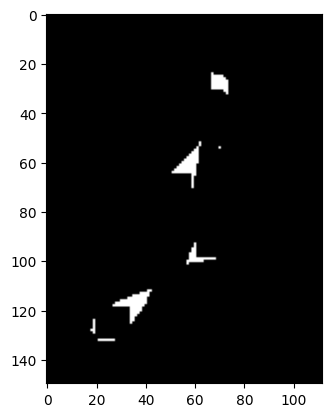

In [52]:
show_img(cv.morphologyEx(jota, cv.MORPH_BLACKHAT, s_e3))